In [69]:
import Functions
import os
from sklearn.metrics import mean_squared_error

%run Functions.py

cwd = '/data/co2flux/common/mdomhoef/Oslo/Oslo_analysis/'
station_data = cwd + 'data/HH_Data_small/'

In [3]:
# Analyse Quant > get number of stations over years and PFT 
years_file = cwd + 'Station_years.csv'
years = pd.read_csv(years_file, index_col = 0)
years = years.loc[2014:2020]

In [4]:
series = pd.DataFrame()
for y in years.index:
    stations, snames = get_stations_year(y)
    stations.set_index(stations['Station'], inplace=True)
    series[str(y)] = stations.groupby('IGBP').count()['Station']

In [5]:
series

,2014,2015,2016,2017,2018,2019,2020
IGBP,,,,,,,
CRO,1,1,1,1,1,1,1
ENF,3,6,6,5,6,6,6
GRA,1,1,1,1,1,1,1


In [6]:
paths = os.listdir(station_data)
paths.remove('.ipynb_checkpoints')

In [7]:
quality = pd.DataFrame()
df_qs = pd.DataFrame()


In [8]:
for y in years.index:
    stations, snames = get_stations_year(y)
    for sitename in snames:
        fls = os.listdir(station_data)
        fls = [x for x, y in zip(fls, [(sitename in file) for file in fls]) if y == True]
        df = pd.read_csv(station_data+fls[0], index_col = 0)
        df.date = pd.to_datetime(df.date)
        df['year'] = df['date'].dt.year
        df = df[df['year'] == y]
        # print(df.columns)
        quality[sitename + str(y) +'QC'] = df.groupby('NEE_VUT_REF_QC').count()['NEE_VUT_REF']
    cols = [col for col in quality.columns if str(y) in col]
    df_qs[str(y)] = quality[cols].sum(axis=1)

In [9]:
df_qs

,2014,2015,2016,2017,2018,2019,2020
NEE_VUT_REF_QC,,,,,,,
0,36116,61191.0,49326.0,46273.0,45671.0,50988.0,58279.0
1,42668,72819.0,80114.0,63765.0,74226.0,75430.0,76619.0
2,5883,5861.0,9529.0,7654.0,11366.0,7141.0,5110.0
3,2933,289.0,1575.0,4948.0,8897.0,6601.0,536.0


In [10]:
# df_qs.loc['Total']= df_qs.sum()
# df_qs = df_qs.drop(index = 'Total')
# df_qs = df_qs.drop(labels = '2014_perc', axis = 1)

In [11]:
for col in df_qs.columns:
    df_qs[col +'_perc'] = 100/df_qs[col].sum()*df_qs[col]

In [12]:
df_qs

,2014,2015,2016,2017,2018,2019,2020,2014_perc,2015_perc,2016_perc,2017_perc,2018_perc,2019_perc,2020_perc
NEE_VUT_REF_QC,,,,,,,,,,,,,,
0,36116,61191.0,49326.0,46273.0,45671.0,50988.0,58279.0,41.228311,43.657962,35.096482,37.730757,32.584903,36.378425,41.466729
1,42668,72819.0,80114.0,63765.0,74226.0,75430.0,76619.0,48.707763,51.954195,57.002789,51.993640,52.958048,53.817066,54.516023
2,5883,5861.0,9529.0,7654.0,11366.0,7141.0,5110.0,6.715753,4.181650,6.780083,6.241031,8.109304,5.094892,3.635872
3,2933,289.0,1575.0,4948.0,8897.0,6601.0,536.0,3.348174,0.206193,1.120645,4.034573,6.347745,4.709618,0.381375


,lambdaGPP,radZero,alpha,beta,Tmin,Tmax,Topt,Station,iveg
Station,,,,,,,,,
FI-Hyy,0.25,220.0,0.2,1.0,-0.6,39.4,21.0,FI-Hyy,0
FI-Let,0.25,220.0,0.2,0.8,-1.0,41.0,21.0,FI-Let,0
FI-Qvd,0.30,220.0,0.2,0.6,-0.6,41.0,19.0,FI-Qvd,5
SE-Ros,0.30,250.0,0.2,0.2,0.6,39.0,19.0,SE-Ros,0
SE-Svb,0.35,220.0,0.2,0.8,1.0,41.0,20.2,SE-Svb,0
SE-Deg,0.20,100.0,0.1,0.0,1.0,40.2,19.4,SE-Deg,6
SE-Htm,0.35,190.0,0.2,1.0,-0.6,41.0,19.4,SE-Htm,0
SE-Nor,0.30,220.0,0.2,1.0,-1.0,41.0,19.4,SE-Nor,0


In [14]:
# load station data RECO
# implement function
# see if alpha and beta in lin function work well (calculate RMSE) of original and not 


In [33]:
df.columns

Index(['TIMESTAMP_START', 'TIMESTAMP_END', 'TA_F_MDS', 'TA_F_MDS_QC', 'TA_F',
       'TA_F_QC', 'SW_IN_F_MDS', 'SW_IN_F', 'VPD_F_MDS', 'VPD_F', 'TS_F_MDS_1',
       'TS_F_MDS_2', 'TS_F_MDS_3', 'TS_F_MDS_4', 'TS_F_MDS_5', 'TS_F_MDS_1_QC',
       'TS_F_MDS_2_QC', 'TS_F_MDS_3_QC', 'TS_F_MDS_4_QC', 'TS_F_MDS_5_QC',
       'NEE_VUT_REF', 'NEE_VUT_REF_QC', 'RECO_NT_VUT_REF', 'GPP_NT_VUT_REF',
       'RECO_DT_VUT_REF', 'GPP_DT_VUT_REF', 'date', 'year'],
      dtype='object')

In [36]:
df.groupby('TA_F_MDS_QC').count()['TA_F_MDS']

TA_F_MDS_QC
0    17466
1       53
2       49
Name: TA_F_MDS, dtype: int64

<AxesSubplot:xlabel='date'>

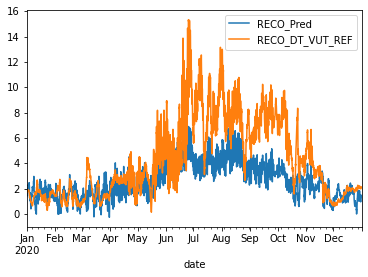

2.5622553063610702

6.5651522549754615

0.3845450572495727 1.0245811290238438


In [95]:
# rmse_update = rmse(df_c['RECO_DT_VUT_REF'], pred_update)


TypeError: 'numpy.float64' object is not callable

In [96]:
print(a,b,m,c)

0.2 1.0 0.3845450572495727 1.0245811290238438
